## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)
pd.set_option('display.max_columns', 100)

## Read data

In [6]:
train = './data/train.csv'
test = './data/test.csv'

df = pd.read_csv(train)
df_test = pd.read_csv(test)
df.sample(n=10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1119,1683,527455030,120,RL,24.0,2304,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,Twnhs,1Story,7,7,1978,1978,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,GLQ,632.0,Unf,6.0,423.0,1061.0,GasA,TA,Y,SBrkr,1055,0,0,1055,0.0,0.0,2,0,2,1,TA,4,Typ,0,NaN,Attchd,1978.0,Unf,1.0,319.0,TA,TA,Y,108,32,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,142500
1001,740,903230100,30,RM,60.0,6911,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,5,5,1924,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,LwQ,405.0,Unf,0.0,740.0,1145.0,GasA,TA,Y,SBrkr,1301,0,0,1301,0.0,0.0,1,0,2,1,Fa,5,Min1,0,NaN,Detchd,1965.0,Unf,2.0,440.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,100000
726,2380,528102080,60,RL,72.0,16387,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,Stone,215.0,Gd,TA,PConc,Ex,Gd,No,GLQ,1369.0,Unf,0.0,369.0,1738.0,GasA,Gd,Y,SBrkr,1738,851,0,2589,1.0,0.0,2,1,4,1,Ex,11,Typ,1,Gd,Attchd,2006.0,RFn,3.0,831.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,412083
608,2868,909425120,20,RL,90.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,7,1956,2004,Gable,CompShg,Stone,Stone,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,296.0,GLQ,547.0,230.0,1073.0,GasA,Ex,Y,SBrkr,1811,0,0,1811,0.0,0.0,1,0,2,1,Ex,6,Typ,1,Gd,Attchd,1956.0,Fin,2.0,470.0,TA,TA,Y,0,0,280,0,0,0,NaN,NaN,NaN,0,7,2006,WD,230000
1020,254,906402200,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1990,1990,Hip,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,1470.0,Unf,0.0,203.0,1673.0,GasA,Gd,Y,SBrkr,1699,1523,0,3222,1.0,0.0,3,0,5,1,Gd,11,Typ,2,TA,Attchd,1990.0,Unf,3.0,594.0,TA,TA,Y,367,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,320000
1701,2687,903425190,50,RM,90.0,33120,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,OldTown,RRAn,Feedr,1Fam,1.5Fin,6,5,1962,1962,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,TA,Y,SBrkr,1611,875,0,2486,0.0,0.0,2,0,5,1,TA,8,Typ,1,Gd,Detchd,1962.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,220000
1124,2782,907200170,80,RL,55.0,10780,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,5,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,483.0,Unf,0.0,428.0,911.0,GasA,Gd,Y,SBrkr,954,0,0,954,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1976.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,132500
434,1465,907262060,60,RL,41.0,10905,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1129.0,1129.0,GasA,Ex,Y,SBrkr,1129,1198,0,2327,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2003.0,RFn,2.0,596.0,TA,TA,Y,0,57,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,240000
514,2082,905475520,30,RL,NaN,11515,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1958,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,943,0,0,943,0.0,0.0,1,0,3,1,Gd,5,Min2,0,NaN,Detchd,1958.0,Unf,1.

## Data exploration

In [4]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


#### Check for missing data

In [5]:
print(len(df.isnull().sum()[df.isnull().sum() > 0]))
print(len(df_test.isnull().sum()[df_test.isnull().sum() > 0]))

print(df.isnull().sum()[df.isnull().sum() > 0], '\n')
#print(df_test.isnull().sum()[df_test.isnull().sum() > 0])
# 1 null in test (electrical)

26
19
Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64 



#### Verifying Caterogical values to use it on model

In [6]:
df['Garage Type'].value_counts(dropna=False)

Attchd     1213
Detchd      536
BuiltIn     132
NaN         113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [7]:
df['MS Zoning'].value_counts(dropna=False)

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [8]:
df['Utilities'].value_counts(dropna=False)
# Not relevant

AllPub    2049
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

In [9]:
df['House Style'].value_counts(dropna=False)

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

In [10]:
df['Sale Type'].value_counts(dropna=False)

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Oth         4
Con         4
Name: Sale Type, dtype: int64

#### Sale Price Distribution

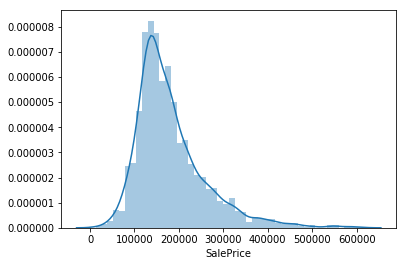

In [11]:
sns.distplot(df['SalePrice']);

#### Correlation heatmap

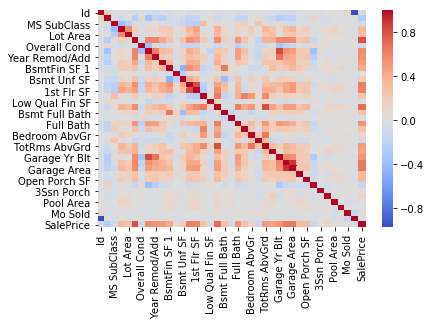

In [12]:
sns.heatmap(df.corr(), cmap = 'coolwarm');
#plt.rcParams['figure.figsize']=(10,10)

# SalePrice is most correlated with Overall Qual, Gr Liv Area, Full Bath, Garage Area/Cars, Year Built
# Variables with a high correlation that may cause problems:
    # Year built -> Garage Yr Blt
    # Garage cars -> Garage area
    # Total basement SF -> 1st Flr SF

#### Pairplots with high-correlation variables

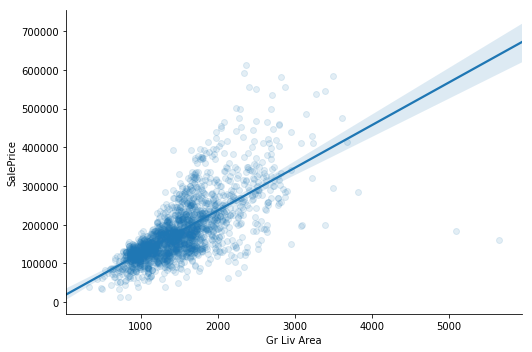

In [13]:
sns.lmplot(x='Gr Liv Area', y='SalePrice', data=df, aspect=1.5, scatter_kws={'alpha':0.12});

#### Relation between Overall Qual and SalePrice

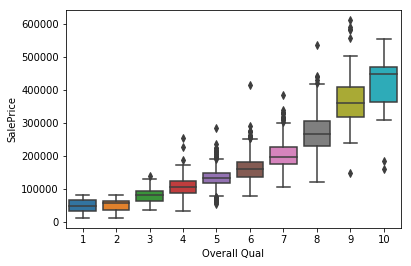

In [14]:
sns.boxplot(x='Overall Qual', y="SalePrice", data=df);

# The higher the qual the more variance there seemse to be
    # There also seem to be more variance around the central quals


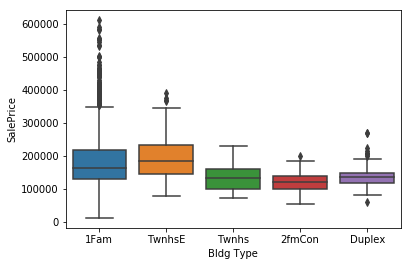

In [15]:
sns.boxplot(x='Bldg Type', y="SalePrice", data=df);
# Not relevant

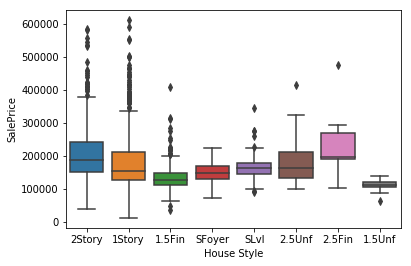

In [16]:
sns.boxplot(x='House Style', y="SalePrice", data=df);

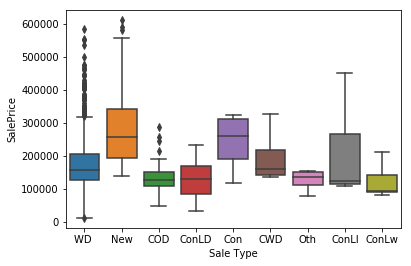

In [17]:
sns.boxplot(x='Sale Type', y="SalePrice", data=df);

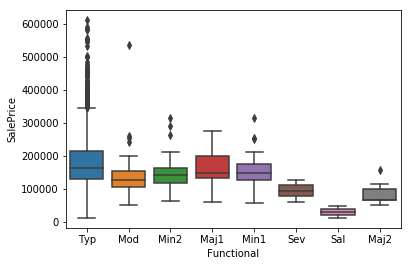

In [10]:
sns.boxplot(x='Functional', y="SalePrice", data=df);

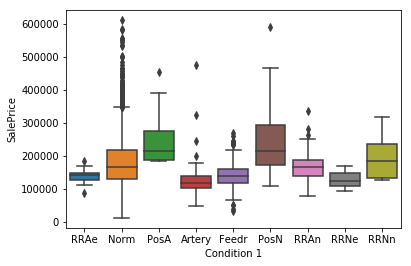

In [7]:
sns.boxplot(x='Condition 1', y="SalePrice", data=df);
# Proximity to roads may affect

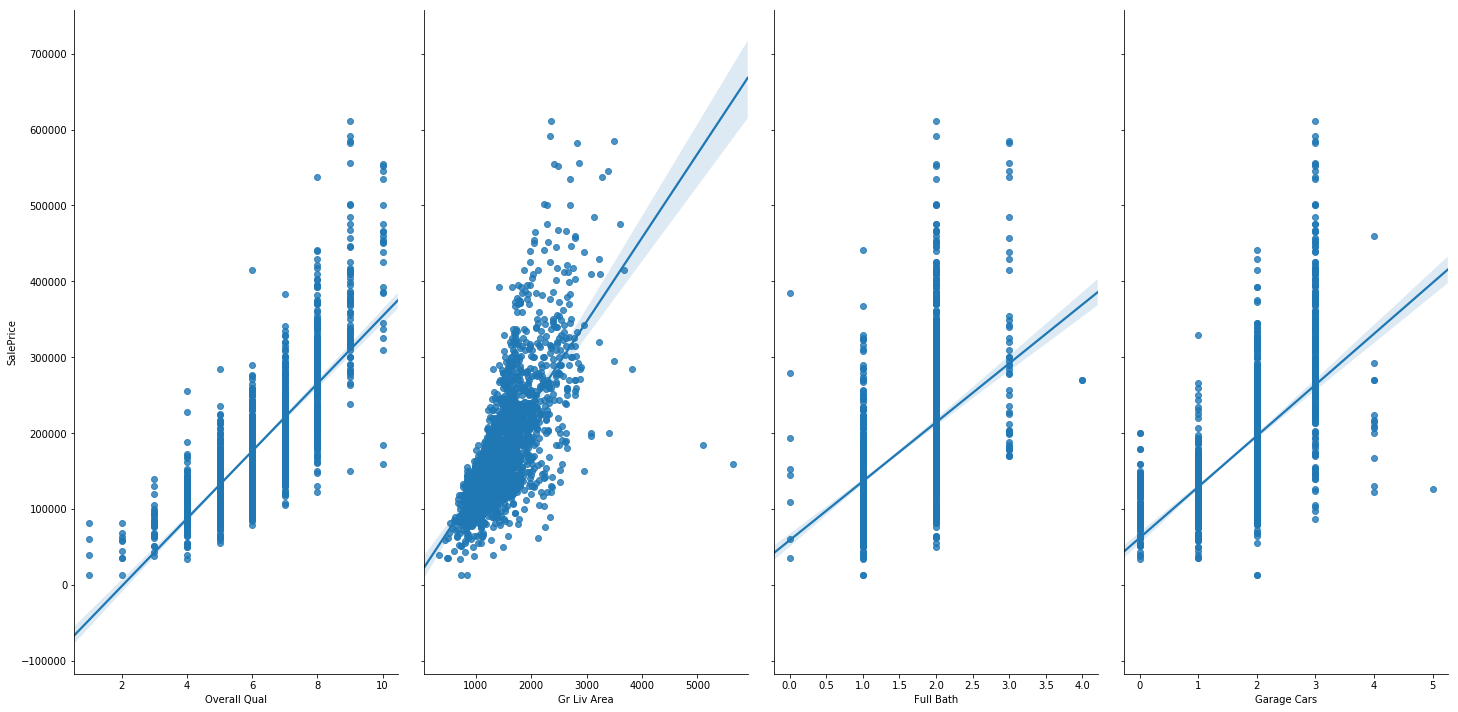

In [18]:
sns.pairplot(df, x_vars=['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Garage Cars'], y_vars='SalePrice', kind='reg', height = 10, aspect = .5);

# Gr Liv Area is the only continuos variable

## Clean Data

#### Replacing nulls in Garage Type

In [19]:
df['Garage Type'] = df['Garage Type'].fillna('None')

#### Removing null columns

In [20]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0]
missing_data = list(missing_data.index)
missing_data

df.drop(missing_data, axis=1, inplace=True)
df.shape

(2051, 56)

#### Dummy Variables & Feature Engineering

In [21]:
garage_dummies = pd.get_dummies(df['Garage Type'], prefix='Garage')
garage_dummies.sample(n=5, random_state=1)

,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,Garage_None
546,0,1,0,0,0,0,0
1290,0,1,0,0,0,0,0
331,0,0,0,1,0,0,0
102,0,1,0,0,0,0,0
1343,0,0,0,1,0,0,0


In [22]:
df['MS Zoning'] = df['MS Zoning'].str.replace('R.', 'R', regex=True)
# All residentials as a single variable

zoning_dummies = pd.get_dummies(df['MS Zoning'], prefix='Zoning')
zoning_dummies.sample(n=5)

,Zoning_A (agr),Zoning_C (all),Zoning_FV,Zoning_I (all),Zoning_R
1588,0,0,0,0,1
1334,0,0,0,0,1
27,0,0,0,0,1
2021,0,0,0,0,1
1472,0,0,0,0,1


In [23]:
h_style_dummies = pd.get_dummies(df['House Style'], prefix='Style')
h_style_dummies = h_style_dummies[['Style_1Story', 'Style_2Story']] # Just the 2 most common
h_style_dummies.sample(n=5)

,Style_1Story,Style_2Story
1912,1,0
135,0,1
701,0,0
1625,0,1
1755,0,1


In [26]:
sale_type_dummies = pd.get_dummies(df['Sale Type'], prefix='Sale')
sale_type_dummies = sale_type_dummies[['Sale_New', 'Sale_WD ']] # Looking for new or WD
sale_type_dummies.sample(5)

,Sale_New,Sale_WD
1960,0,1
561,0,0
1765,0,1
1394,0,1
297,0,1


Overall Qual
Year Built
Gr Liv Area
Full Bath
Garage Cars
Lot Area
Remodeled = Year Remod/Add - Year Built 

In [130]:
dummies = pd.concat([garage_dummies, zoning_dummies, h_style_dummies, sale_type_dummies], axis=1)